## Gather

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json

For this project I will be working with big data sets, and I want Python to display whole data instead of the truncated data, so I will change the display settings.

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-2-1390d13c0cdd>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [3]:
# Gathering the WeRateDogs Twitter archive
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# Gathering the tweet image predictions file (image_predictions.tsv)
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [5]:
# Reading the image_predictions_tsv into a data frame
predictions = []

for i, line in enumerate(open(os.path.join(folder_name, url.split('/')[-1]), mode='rb')):
    predictions.append(line.decode("utf-8").split("\t"))
    
predictions = pd.DataFrame(predictions)

In [6]:
# Gathering additional data: retweet count and favorite count by:

    # passing the key's and tokens values and creating API object
consumer_key = 'MY_CONSUMER-KEY'
consumer_secret = 'MY_CONSUMER_SECRET'
access_token = 'MY_ACCESS_TOKEN'
access_secret = 'MY_ACCESS_SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [7]:
api_counts = {}

# creating a for loop which queries the tweet ids from the tweet archive and passes them into the 
# api.get_status function to collect the retweet and favorite counts, and appends all three values into 
# api_counts 
for i in range(len(twitter_archive)):
    try:
        tweet_id = twitter_archive.tweet_id[i]
        tweet = api.get_status(tweet_id,tweet_mode='extended')
        api_counts[int(tweet_id)] = {
            'retweet_count':tweet._json['retweet_count'],
            'favorite_count':tweet._json['favorite_count']
        }
        if i % 100 == 0: print(f"{i} tweets processed.")
    except tweepy.TweepError:
        print(f"Tweet with ID '{tweet_id}' does not exist.")

0 tweets processed.
Tweet with ID '888202515573088257' does not exist.
Tweet with ID '873697596434513921' does not exist.
100 tweets processed.
Tweet with ID '872668790621863937' does not exist.
Tweet with ID '872261713294495745' does not exist.
Tweet with ID '869988702071779329' does not exist.
Tweet with ID '866816280283807744' does not exist.
Tweet with ID '861769973181624320' does not exist.
Tweet with ID '856602993587888130' does not exist.
200 tweets processed.
Tweet with ID '851953902622658560' does not exist.
Tweet with ID '845459076796616705' does not exist.
Tweet with ID '844704788403113984' does not exist.
Tweet with ID '842892208864923648' does not exist.
Tweet with ID '837366284874571778' does not exist.
Tweet with ID '837012587749474308' does not exist.
300 tweets processed.
Tweet with ID '829374341691346946' does not exist.
Tweet with ID '827228250799742977' does not exist.
400 tweets processed.
500 tweets processed.
Tweet with ID '812747805718642688' does not exist.
Twe

Rate limit reached. Sleeping for: 547


900 tweets processed.
Tweet with ID '754011816964026368' does not exist.
1000 tweets processed.
1100 tweets processed.
1200 tweets processed.
1300 tweets processed.
1400 tweets processed.
1500 tweets processed.
1600 tweets processed.
1700 tweets processed.
Tweet with ID '680055455951884288' does not exist.


Rate limit reached. Sleeping for: 532


1800 tweets processed.
1900 tweets processed.
2000 tweets processed.
2100 tweets processed.
2200 tweets processed.
2300 tweets processed.


In [8]:
# Writing the api_counts object into the json file
with open("tweet_json.txt", "w") as outfile:
    for key in api_counts.keys():
        value = api_counts[key]
        json.dump({key: value}, outfile)
        outfile.write('\n')

In [7]:
# Reading line by line the tweet_json.txt file into an empty dict
counts_dict = {}
for i, line in enumerate(open('tweet_json.txt', 'r')):
    line_data = json.loads(line)
    key = list(line_data.keys())[0]
    value = line_data[key]
    value['tweet_id'] = key
    counts_dict[i] = value

In [8]:
counts_dict

{0: {'retweet_count': 7657,
  'favorite_count': 35979,
  'tweet_id': '892420643555336193'},
 1: {'retweet_count': 5661,
  'favorite_count': 31064,
  'tweet_id': '892177421306343426'},
 2: {'retweet_count': 3754,
  'favorite_count': 23373,
  'tweet_id': '891815181378084864'},
 3: {'retweet_count': 7823,
  'favorite_count': 39276,
  'tweet_id': '891689557279858688'},
 4: {'retweet_count': 8423,
  'favorite_count': 37512,
  'tweet_id': '891327558926688256'},
 5: {'retweet_count': 2827,
  'favorite_count': 18901,
  'tweet_id': '891087950875897856'},
 6: {'retweet_count': 1842,
  'favorite_count': 10985,
  'tweet_id': '890971913173991426'},
 7: {'retweet_count': 17087,
  'favorite_count': 60649,
  'tweet_id': '890729181411237888'},
 8: {'retweet_count': 3889,
  'favorite_count': 26015,
  'tweet_id': '890609185150312448'},
 9: {'retweet_count': 6649,
  'favorite_count': 29732,
  'tweet_id': '890240255349198849'},
 10: {'retweet_count': 6635,
  'favorite_count': 28608,
  'tweet_id': '89000660

In [9]:
# Converting the above created dict into a data frame
counts = pd.DataFrame(counts_dict)
counts

0                   1                   2  \
retweet_count   7657                5661                3754                 
favorite_count  35979               31064               23373                
tweet_id        892420643555336193  892177421306343426  891815181378084864   

                                 3                   4                   5  \
retweet_count   7823                8423                2827                 
favorite_count  39276               37512               18901                
tweet_id        891689557279858688  891327558926688256  891087950875897856   

                                 6                   7                   8  \
retweet_count   1842                17087               3889                 
favorite_count  10985               60649               26015                
tweet_id        890971913173991426  890729181411237888  890609185150312448   

                                 9                  10                  11  \
retweet_count   6649                6635                4517                 
favorite_count  29732               28608               26024                
tweet_id        890240255349198849  890006608113172480  889880896479866881   

                                12                  13                  14  \
retweet_count   9053                4057                2047                 
favorite_count  44797               25212               14132                
tweet_id        889665388333682689  889638837579907072  889531135344209921   

                                15                  16                  17  \
retweet_count   4832                4070                3839                 
favorite_count  23498               27153               23843                
tweet_id        889278841981685760  888917238123831296  888804989199671297   

                                18                  19                  20  \
retweet_count   3150                3144                4892                 
favorite_count  18401               20318               28205                
tweet_id        888554962724278272  888078434458587136  887705289381826560   

                                21                  22                  23  \
retweet_count   10669               16299               9490                 
favorite_count  43263               64116               31395                
tweet_id        887517139158093824  887473957103951883  887343217045368832   

                                24                  25                  26  \
retweet_count   5407                6949                2914                 
favorite_count  28567               32549               11173                
tweet_id        887101392804085760  886983233522544640  886736880519319552   

                                27                  28                  29  \
retweet_count   4058                2872                4                    
favorite_count  20971               19708               111                  
tweet_id        886680336477933568  886366144734445568  886267009285017600   

                                30                  31                  32  \
retweet_count   5722                100                 6087                 
favorite_count  26110               0                   30392                
tweet_id        886258384151887873  886054160059072513  885984800019947520   

                                33                  34                  35  \
retweet_count   5793                3385                16783                
favorite_count  33527               19103               0                    
tweet_id        885528943205470208  885518971528720385  885311592912609280   

                                36                  37                  38  \
retweet_count   3959                16385               5057                 
favorite_count  20423               71878               25967                
tweet_id        885167619883638784  8849255

In [10]:
counts = counts.T

# Assess

    Assessing the twitter_archive data frame: 

In [11]:
twitter_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193 NaN                    NaN                    
1     892177421306343426 NaN                    NaN                    
2     891815181378084864 NaN                    NaN                    
3     891689557279858688 NaN                    NaN                    
4     891327558926688256 NaN                    NaN                    
5     891087950875897856 NaN                    NaN                    
6     890971913173991426 NaN                    NaN                    
7     890729181411237888 NaN                    NaN                    
8     890609185150312448 NaN                    NaN                    
9     890240255349198849 NaN                    NaN                    
10    890006608113172480 NaN                    NaN                    
11    889880896479866881 NaN                    NaN                    
12    889665388333682689 NaN                    NaN                    
13    889638837579907072 NaN                    NaN                    
14    889531135344209921 NaN                    NaN                    
15    889278841981685760 NaN                    NaN                    
16    888917238123831296 NaN                    NaN                    
17    888804989199671297 NaN                    NaN                    
18    888554962724278272 NaN                    NaN                    
19    888202515573088257 NaN                    NaN                    
20    888078434458587136 NaN                    NaN                    
21    887705289381826560 NaN                    NaN                    
22    887517139158093824 NaN                    NaN                    
23    887473957103951883 NaN                    NaN                    
24    887343217045368832 NaN                    NaN                    
25    887101392804085760 NaN                    NaN                    
26    886983233522544640 NaN                    NaN                    
27    886736880519319552 NaN                    NaN                    
28    886680336477933568 NaN                    NaN                    
29    886366144734445568 NaN                    NaN                    
30    886267009285017600  8.862664e+17           2.281182e+09          
31    886258384151887873 NaN                    NaN                    
32    886054160059072513 NaN                    NaN                    
33    885984800019947520 NaN                    NaN                    
34    885528943205470208 NaN                    NaN                    
35    885518971528720385 NaN                    NaN                    
36    885311592912609280 NaN                    NaN                    
37    885167619883638784 NaN                    NaN                    
38    884925521741709313 NaN                    NaN                    
39    884876753390489601 NaN                    NaN                    
40    884562892145688576 NaN                    NaN                    
41    884441805382717440 NaN                    NaN                    
42    884247878851493888 NaN                    NaN                    
43    884162670584377345 NaN                    NaN                    
44    883838122936631299 NaN                    NaN                    
45    883482846933004288 NaN                    NaN                    
46    883360690899218434 NaN                    NaN                    
47    883117836046086144 NaN                    NaN                    
48    882992080364220416 NaN                    NaN                    
49    882762694511734784 NaN                    NaN                    
50    882627270321602560 NaN                    NaN                    
51    882268110199369728 NaN                    NaN                    
52    882045870035918850 NaN                    NaN                    
53    881906580714921986 NaN                    NaN                    
54    881666595344535552 NaN                    NaN     

In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [14]:
twitter_archive.rating_numerator.describe()

count    2356.000000
mean     13.126486  
std      45.876648  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_numerator, dtype: float64

In [15]:
twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [16]:
twitter_archive[twitter_archive.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [17]:
twitter_archive[twitter_archive.name == 'None'].count()

tweet_id                      745
in_reply_to_status_id         77 
in_reply_to_user_id           77 
timestamp                     745
source                        745
text                          745
retweeted_status_id           65 
retweeted_status_user_id      65 
retweeted_status_timestamp    65 
expanded_urls                 686
rating_numerator              745
rating_denominator            745
name                          745
doggo                         745
floofer                       745
pupper                        745
puppo                         745
dtype: int64

In [18]:
names_None = [name for name in twitter_archive.name if type(name) is str and name == 'None']

In [19]:
len(names_None)

745

In [20]:
names = [name for name in twitter_archive.name if type(name) is str and len(name) == 1]

In [21]:
names

['a',
 'a',
 'O',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a']

In [22]:
twitter_archive.timestamp.sort_values()

2355    2015-11-15 22:32:08 +0000
2354    2015-11-15 23:05:30 +0000
2353    2015-11-15 23:21:54 +0000
2352    2015-11-16 00:04:52 +0000
2351    2015-11-16 00:24:50 +0000
2350    2015-11-16 00:30:50 +0000
2349    2015-11-16 00:35:11 +0000
2348    2015-11-16 00:49:46 +0000
2347    2015-11-16 00:55:59 +0000
2346    2015-11-16 01:01:59 +0000
2345    2015-11-16 01:22:45 +0000
2344    2015-11-16 01:52:02 +0000
2343    2015-11-16 01:59:36 +0000
2342    2015-11-16 02:38:37 +0000
2341    2015-11-16 03:22:39 +0000
2340    2015-11-16 03:44:34 +0000
2339    2015-11-16 03:55:04 +0000
2338    2015-11-16 04:02:55 +0000
2337    2015-11-16 14:57:41 +0000
2336    2015-11-16 15:14:19 +0000
2335    2015-11-16 16:11:11 +0000
2334    2015-11-16 16:37:02 +0000
2333    2015-11-16 19:31:45 +0000
2332    2015-11-16 20:01:42 +0000
2331    2015-11-16 20:32:58 +0000
2330    2015-11-16 21:10:36 +0000
2329    2015-11-16 21:54:18 +0000
2328    2015-11-16 23:23:41 +0000
2327    2015-11-17 00:06:54 +0000
2326    2015-1

In [23]:
twitter_archive.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [24]:
twitter_archive.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [25]:
twitter_archive.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [26]:
twitter_archive.puppo.value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

    Assessing the counts data frame:

In [27]:
counts

retweet_count favorite_count            tweet_id
0     7657          35979          892420643555336193
1     5661          31064          892177421306343426
2     3754          23373          891815181378084864
3     7823          39276          891689557279858688
4     8423          37512          891327558926688256
5     2827          18901          891087950875897856
6     1842          10985          890971913173991426
7     17087         60649          890729181411237888
8     3889          26015          890609185150312448
9     6649          29732          890240255349198849
10    6635          28608          890006608113172480
11    4517          26024          889880896479866881
12    9053          44797          889665388333682689
13    4057          25212          889638837579907072
14    2047          14132          889531135344209921
15    4832          23498          889278841981685760
16    4070          27153          888917238123831296
17    3839          23843          888804989199671297
18    3150          18401          888554962724278272
19    3144          20318          888078434458587136
20    4892          28205          887705289381826560
21    10669         43263          887517139158093824
22    16299         64116          887473957103951883
23    9490          31395          887343217045368832
24    5407          28567          887101392804085760
25    6949          32549          886983233522544640
26    2914          11173          886736880519319552
27    4058          20971          886680336477933568
28    2872          19708          886366144734445568
29    4             111            886267009285017600
30    5722          26110          886258384151887873
31    100           0              886054160059072513
32    6087          30392          885984800019947520
33    5793          33527          885528943205470208
34    3385          19103          885518971528720385
35    16783         0              885311592912609280
36    3959          20423          885167619883638784
37    16385         71878          884925521741709313
38    5057          25967          884876753390489601
39    4259          22674          884562892145688576
40    5162          25291          884441805382717440
41    18409         67696          884247878851493888
42    2714          19032          884162670584377345
43    3107          20388          883838122936631299
44    8952          42752          883482846933004288
45    3356          21154          883360690899218434
46    6024          34625          883117836046086144
47    3529          22292          882992080364220416
48    4430          26350          882762694511734784
49    5505          26119          882627270321602560
50    10489         41809          882268110199369728
51    4430          27355          882045870035918850
52    3082          22721          881906580714921986
53    9668          47271          881666595344535552
54    7             117            881633300179243008
55    14486         46160          881536004380872706
56    4790          21670          881268444196462592
57    2534          15959          880935762899988482
58    3474          19863          880872448815771648
59    5638          26555          880465832366813184
60    3784          25160          880221127280381952
61    3934          25765          880095782870896641
62    3170          20884          879862464715927552
63    10            295            879674319642796034
64    2898          21917          879492040517615616
65    40356         98744          879415818425184262
66    2840          15703          879376492567855104
67    6175          0              879130579576475649
68    4273          21040          879050749262655488
69    2430          17759          879008229531029506
70    3713          18101          878776093423087618
71    6438          28141          878604707211726852
72    1170          0              878404777348136964
73    604

In [28]:
counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   retweet_count   2331 non-null   object
 1   favorite_count  2331 non-null   object
 2   tweet_id        2331 non-null   object
dtypes: object(3)
memory usage: 152.8+ KB


In [29]:
counts.describe()

retweet_count  favorite_count            tweet_id
count   2331           2331            2331              
unique  1680           2010            2331              
top     857            0               813096984823349248
freq    5              163             1

In [30]:
counts[counts.tweet_id.duplicated()]

Empty DataFrame
Columns: [retweet_count, favorite_count, tweet_id]
Index: []

In [31]:
sum(counts.retweet_count.isnull())

0

In [32]:
sum(counts.favorite_count.isnull())

0

In [33]:
overlapping_id_counts = twitter_archive[twitter_archive['tweet_id'].isin(counts['tweet_id'])]

In [34]:
overlapping_id_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2331 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2331 non-null   object 
 4   source                      2331 non-null   object 
 5   text                        2331 non-null   object 
 6   retweeted_status_id         163 non-null    float64
 7   retweeted_status_user_id    163 non-null    float64
 8   retweeted_status_timestamp  163 non-null    object 
 9   expanded_urls               2272 non-null   object 
 10  rating_numerator            2331 non-null   int64  
 11  rating_denominator          2331 non-null   int64  
 12  name                        2331 non-null   object 
 13  doggo                       2331 

    Assessing the above-created predictions data frame

In [35]:
predictions

0  \
0     tweet_id             
1     666020888022790149   
2     666029285002620928   
3     666033412701032449   
4     666044226329800704   
5     666049248165822465   
6     666050758794694657   
7     666051853826850816   
8     666055525042405380   
9     666057090499244032   
10    666058600524156928   
11    666063827256086533   
12    666071193221509120   
13    666073100786774016   
14    666082916733198337   
15    666094000022159362   
16    666099513787052032   
17    666102155909144576   
18    666104133288665088   
19    666268910803644416   
20    666273097616637952   
21    666287406224695296   
22    666293911632134144   
23    666337882303524864   
24    666345417576210432   
25    666353288456101888   
26    666362758909284353   
27    666373753744588802   
28    666396247373291520   
29    666407126856765440   
30    666411507551481857   
31    666418789513326592   
32    666421158376562688   
33    666428276349472768   
34    666430724426358785   
35    666435652385423360   
36    666437273139982337   
37    666447344410484738   
38    666454714377183233   
39    666644823164719104   
40    666649482315059201   
41    666691418707132416   
42    666701168228331520   
43    666739327293083650   
44    666776908487630848   
45    666781792255496192   
46    666786068205871104   
47    666804364988780544   
48    666817836334096384   
49    666826780179869698   
50    666835007768551424   
51    666837028449972224   
52    666983947667116034   
53    666996132027977728   
54    667012601033924608   
55    667044094246576128   
56    667062181243039745   
57    667065535570550784   
58    667073648344346624   
59    667090893657276420   
60    667119796878725120   
61    667138269671505920   
62    667152164079423490   
63    667160273090932737   
64    667165590075940865   
65    667171260800061440   
66    667174963120574464   
67    667176164155375616   
68    667177989038297088   
69    667182792070062081   
70    667188689915760640   
71    667192066997374976   
72    667200525029539841   
73    667211855547486208   
74    667369227918143488   
75    667393430834667520   
76    667405339315146752   
77    667435689202614272   
78    667437278097252352   
79    667443425659232256   
80    667453023279554560   
81    667455448082227200   
82    667470559035432960   
83    667491009379606528   
84    667495797102141441   
85    667502640335572993   
86    667509364010450944   
87    667517642048163840   
88    667524857454854144   
89    667530908589760512   
90    667534815156183040   
91    667538891197542400   
92    667544320556335104   
93    667546741521195010   
94    667549055577362432   
95    667550882905632768   
96    667550904950915073   
97    667724302356258817   
98    667728196545200128   
99    667766675769573376   
100   667773195014021121   
101   667782464991965184   
102   667793409583771648   
103   667801013445750784   
104   667806454573760512   
105   667832474953625600   
106   667861340749471744   
107   667866724293877760   
108   667873844930215936   
109   667878741721415682   
110   667885044254572545   
111   667886921285246976   
112   667902449697558528   
113   667911425562669056   
114   667915453470232577   
115   667924896115245057   
116   667937095915278337   
117   668113020489474048   
118   668142349051129856   
119   668154635664932864   
120   668171859951755264   
121   668190681446379520   
122   668204964695683073   
123   668221241640230912   
124   668226093875376128   
125   668237644992782336   
126   668248472370458624   
127   668256321989451776   
128   668268907921326080   
129   668274247790391296   
130   668286279830867968   
131   668291999406125056   
132   668297328638447616   
133   668466899341221888   
134   668480044826800133   
135   668484198282485761   
136   668496999348633600   
137   668507509523615744   
138   668528771708952576   
139   668537837512433665   
140   668542336805281792   
141   668544745690562560   
142   6685678220926

In [36]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2076 non-null   object
 1   1       2076 non-null   object
 2   2       2076 non-null   object
 3   3       2076 non-null   object
 4   4       2076 non-null   object
 5   5       2076 non-null   object
 6   6       2076 non-null   object
 7   7       2076 non-null   object
 8   8       2076 non-null   object
 9   9       2076 non-null   object
 10  10      2076 non-null   object
 11  11      2076 non-null   object
dtypes: object(12)
memory usage: 194.8+ KB


In [37]:
overlapping_id_predict = twitter_archive[twitter_archive['tweet_id'].isin(predictions.iloc[:, 0])]
overlapping_id_predict

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

## Quality issues

### `twitter_archive` data frame:
1. Missing values for the following columns:
        - in_reply_to_status_id
        - in_reply_to_user_id
        - retweeted_status_id
        - retweeted_status_user_id
        - retweeted_status_timestamp
        - expanded_urls
2. Erroneous datatypes for the following columns:
        - timestamp
        - doggo
        - floofer
        - pupper
        - puppo
3. Missing and erroneous values for the column:
        - name
4. Erroneous values for the rating columns:
        - numerators' values that fluctuate strongly from the widely used values --> values of frequencies of 2 and lower
        - denominators's values different than 10


### `counts` data frame:
5. Erroneous datatypes for the following column: 
        - retweet_count
        - favorite_count
        - tweet_id
6. Number of tweet_ids do not match the number of tweet_id from the twitter_archive

### `predictions` data frame:        
7. Indexes set as coulum names istead of variables names. 
8. Erroneous data type for the following columns: 
        - tweet_id
        - img_num
        - p1_conf
        - p2_conf
        - p3_conf
9. Following variables names and column values are written in a confusing, inconsitent and messy way:
        - variable names: p1, p1_conf, p1_dog, etc.
        - column values: p1, p1_conf, p2, p2_conf, p3, p3_conf
10. Erroneous suffix '\n' added to the name and values of p3_dog column

## Clean

In [38]:
twitter_archive_master = twitter_archive.copy()
counts_master = counts.copy()
predictions_master = predictions.copy()

### Twitter archive master data frame

1. The below listed columns consist mostly of null values and are redunant for the current project therefore the best decision to hande these messy looking data is to drop them. The following columns will be dropped:

    - in_reply_to_status_id
    - in_reply_to_user_id
    - retweeted_status_id
    - retweeted_status_user_id
    - retweeted_status_timestamp

In [39]:
twitter_archive_master = twitter_archive_master.drop(['in_reply_to_status_id','in_reply_to_user_id',
                                                      'retweeted_status_id','retweeted_status_user_id',
                                                      'retweeted_status_timestamp'],axis=1)

   ### Test

In [40]:
twitter_archive_master.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                        
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                    
3  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                              
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                                                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name doggo floofer pupper puppo  
0  13                10                  Phineas   None  None    None   None  
1  13                10                  Tilly     None  None    None   None  
2  12                10                  Archie    None  None    None   None  
3  13                10                  Darla     None  None    None   None  
4  12                10                  Franklin  None  None    None   None

1. The expand_urls column also contains few null values, unfortunately we are not able to fill them in anyway, so the best option seems like dropping the row that are containing the null values for this particular column. 

In [41]:
twitter_archive_master.dropna(subset=['expanded_urls'],inplace=True)

### Test

In [42]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2297 non-null   int64 
 1   timestamp           2297 non-null   object
 2   source              2297 non-null   object
 3   text                2297 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2297 non-null   int64 
 6   rating_denominator  2297 non-null   int64 
 7   name                2297 non-null   object
 8   doggo               2297 non-null   object
 9   floofer             2297 non-null   object
 10  pupper              2297 non-null   object
 11  puppo               2297 non-null   object
dtypes: int64(3), object(9)
memory usage: 233.3+ KB


2. Changing the type of timestamp column from the object data type to datetime.

In [43]:
twitter_archive_master['timestamp'] = pd.to_datetime(arg=twitter_archive_master.timestamp)

### Test

In [44]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2297 non-null   int64              
 1   timestamp           2297 non-null   datetime64[ns, UTC]
 2   source              2297 non-null   object             
 3   text                2297 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2297 non-null   int64              
 6   rating_denominator  2297 non-null   int64              
 7   name                2297 non-null   object             
 8   doggo               2297 non-null   object             
 9   floofer             2297 non-null   object             
 10  pupper              2297 non-null   object             
 11  puppo               2297 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

2. Changing data types of dog's breed columns from object data type to category.

In [45]:
twitter_archive_master.doggo = twitter_archive_master.doggo.astype('category')
twitter_archive_master.floofer = twitter_archive_master.floofer.astype('category')
twitter_archive_master.pupper = twitter_archive_master.pupper.astype('category')
twitter_archive_master.puppo = twitter_archive_master.puppo.astype('category')

### Test

In [46]:
twitter_archive_master.dtypes

tweet_id              int64              
timestamp             datetime64[ns, UTC]
source                object             
text                  object             
expanded_urls         object             
rating_numerator      int64              
rating_denominator    int64              
name                  object             
doggo                 category           
floofer               category           
pupper                category           
puppo                 category           
dtype: object

3. Dropping the null and erroneous values of the name column.

In [47]:
twitter_archive_master = twitter_archive_master[twitter_archive_master.name != 'None']

In [48]:
twitter_archive_master = twitter_archive_master[twitter_archive_master.name != 'a']

### Test

In [49]:
twitter_archive_master[twitter_archive_master.name == 'None'].count()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

In [50]:
twitter_archive_master[twitter_archive_master.name == 'a'].count()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

4. Dropping all rows with numerators values of freaquancy 2 and lower

In [51]:
thresh = 2 
col = twitter_archive_master.rating_numerator

twitter_archive_master = twitter_archive_master[twitter_archive_master.groupby(col)["rating_numerator"].transform('count')>thresh]

### Test

In [52]:
twitter_archive_master.rating_numerator.value_counts()

12    395
11    350
10    298
13    211
9     107
8     77 
7     34 
14    24 
6     18 
5     14 
3     10 
4     5  
2     5  
Name: rating_numerator, dtype: int64

4. Dropping all rows with denominator values different than 10r

In [53]:
twitter_archive_master = twitter_archive_master[twitter_archive_master.rating_denominator == 10]

### Test

In [54]:
twitter_archive_master.rating_denominator.value_counts()

10    1547
Name: rating_denominator, dtype: int64

### Counts master data frame

5. Correcting the data type for the following columns: retweet_count, favorite_count and tweet_id.

In [55]:
counts_master = counts_master.astype(int)

### Test

In [56]:
counts_master.dtypes

retweet_count     int64
favorite_count    int64
tweet_id          int64
dtype: object

6. Matching the tweet_ids from counts_master with tweet_ids from cleaned twitter_archive_master data frame.

In [57]:
counts_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   retweet_count   2331 non-null   int64
 1   favorite_count  2331 non-null   int64
 2   tweet_id        2331 non-null   int64
dtypes: int64(3)
memory usage: 72.8 KB


In [58]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 0 to 2349
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1547 non-null   int64              
 1   timestamp           1547 non-null   datetime64[ns, UTC]
 2   source              1547 non-null   object             
 3   text                1547 non-null   object             
 4   expanded_urls       1547 non-null   object             
 5   rating_numerator    1547 non-null   int64              
 6   rating_denominator  1547 non-null   int64              
 7   name                1547 non-null   object             
 8   doggo               1547 non-null   category           
 9   floofer             1547 non-null   category           
 10  pupper              1547 non-null   category           
 11  puppo               1547 non-null   category           
dtypes: category(4), datetime64[ns, UTC

In [59]:
counts_master = counts_master[counts_master['tweet_id'].isin(twitter_archive_master['tweet_id'])]

In [60]:
twitter_archive_master = twitter_archive_master[twitter_archive_master['tweet_id'].isin(counts_master['tweet_id'])]

### Test

In [61]:
counts_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1531 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   retweet_count   1531 non-null   int64
 1   favorite_count  1531 non-null   int64
 2   tweet_id        1531 non-null   int64
dtypes: int64(3)
memory usage: 47.8 KB


In [62]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1531 entries, 0 to 2349
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1531 non-null   int64              
 1   timestamp           1531 non-null   datetime64[ns, UTC]
 2   source              1531 non-null   object             
 3   text                1531 non-null   object             
 4   expanded_urls       1531 non-null   object             
 5   rating_numerator    1531 non-null   int64              
 6   rating_denominator  1531 non-null   int64              
 7   name                1531 non-null   object             
 8   doggo               1531 non-null   category           
 9   floofer             1531 non-null   category           
 10  pupper              1531 non-null   category           
 11  puppo               1531 non-null   category           
dtypes: category(4), datetime64[ns, UTC

In [63]:
values = np.intersect1d(twitter_archive_master['tweet_id'], counts_master['tweet_id'])
len(values)

1531

### Predictions master data frame

7. Setting names of the variables as column names.

In [64]:
predictions_master.columns = predictions_master.iloc[0]
predictions_master.drop(predictions_master.index[0], inplace=True)

### Test

In [65]:
predictions_master.head()

0            tweet_id                                          jpg_url  \
1  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
2  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
3  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
4  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
5  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

0 img_num                      p1   p1_conf p1_dog                  p2  \
1  1       Welsh_springer_spaniel  0.465074  True   collie               
2  1       redbone                 0.506826  True   miniature_pinscher   
3  1       German_shepherd         0.596461  True   malinois             
4  1       Rhodesian_ridgeback     0.408143  True   redbone              
5  1       miniature_pinscher      0.560311  True   Rottweiler           

0              p2_conf p2_dog                   p3              p3_conf  \
1  0.156665             True   Shetland_sheepdog    0.0614285             
2  0.07419169999999999  True   Rhodesian_ridgeback  0.07201               
3  0.13858399999999998  True   bloodhound           0.11619700000000001   
4  0.360687             True   miniature_pinscher   0.222752              
5  0.243682             True   Doberman             0.154629              

0 p3_dog\n  
1  True\n   
2  True\n   
3  True\n   
4  True\n   
5  True\n

8. Changing erroneous data type for the following columns: 
        - tweet_id
        - img_num
        - p1_conf
        - p2_conf
        - p3_conf

In [66]:
convert_dict = {'tweet_id': int, 
                'img_num': int,
                'p1_conf' : float,
                'p2_conf' : float,
                'p3_conf' : float,
               } 

predictions_master = predictions_master.astype(convert_dict)

### Test

In [67]:
predictions_master.dtypes

0
tweet_id    int64  
jpg_url     object 
img_num     int64  
p1          object 
p1_conf     float64
p1_dog      object 
p2          object 
p2_conf     float64
p2_dog      object 
p3          object 
p3_conf     float64
p3_dog\n    object 
dtype: object

9. Changing the confuising names of the following columns: p1, p1_conf, p1_dog.

In [68]:
predictions_master.rename({
    'p1' : 'prediction_1',
    'p1_conf' : 'confidence_value_1',
    'p1_dog' : 'dog_1_predicted',
    'p2' : 'prediction_2',
    'p2_conf' : 'confidence_value_2',
    'p2_dog' : 'dog_2_predicted',
    'p3' : 'prediction_3',
    'p3_conf' : 'confidence_value_3',
    'p3_dog\n' : 'dog_3_predicted'
}, axis=1, inplace=True)

### Test

In [69]:
predictions_master.head()

0            tweet_id                                          jpg_url  \
1  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
2  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
3  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
4  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
5  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

0  img_num            prediction_1  confidence_value_1 dog_1_predicted  \
1  1        Welsh_springer_spaniel  0.465074            True             
2  1        redbone                 0.506826            True             
3  1        German_shepherd         0.596461            True             
4  1        Rhodesian_ridgeback     0.408143            True             
5  1        miniature_pinscher      0.560311            True             

0        prediction_2  confidence_value_2 dog_2_predicted  \
1  collie              0.156665            True             
2  miniature_pinscher  0.074192            True             
3  malinois            0.138584            True             
4  redbone             0.360687            True             
5  Rottweiler          0.243682            True             

0         prediction_3  confidence_value_3 dog_3_predicted  
1  Shetland_sheepdog    0.061428            True\n          
2  Rhodesian_ridgeback  0.072010            True\n          
3  bloodhound           0.116197            True\n          
4  miniature_pinscher   0.222752            True\n          
5  Doberman             0.154629            True\n

9. Changing the inconsistent values for the three confidence columns, by rounding values to the third decimal

In [70]:
predictions_master = predictions_master.round(decimals=3)

### Test

In [71]:
predictions_master.sample(10)

0               tweet_id                                          jpg_url  \
1459  777885040357281792  https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg   
1694  816014286006976512  https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg   
774   689599056876867584  https://pbs.twimg.com/media/CZHyrvOXEAEin-A.jpg   
724   686007916130873345  https://pbs.twimg.com/media/CYUwjz-UAAEcdi8.jpg   
815   692568918515392513  https://pbs.twimg.com/media/CZx_wV2UMAArgsJ.jpg   
97    667724302356258817  https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg   
1446  775842724423557120  https://pbs.twimg.com/media/CsRY1jAWYAUOx55.jpg   
347   672466075045466113  https://pbs.twimg.com/media/CVUUU_EWoAAxABV.jpg   
1506  785264754247995392  https://pbs.twimg.com/media/CuXSHNnWcAIWEwn.jpg   
976   707014260413456384  https://pbs.twimg.com/media/Cc_RsVlXEAIzzlX.jpg   

0     img_num         prediction_1  confidence_value_1 dog_1_predicted  \
1459  1        Afghan_hound         0.124               True             
1694  1        English_setter       0.677               True             
774   1        dogsled              0.426               False            
724   1        Rhodesian_ridgeback  0.885               True             
815   2        golden_retriever     0.637               True             
97    1        ibex                 0.619               False            
1446  2        chow                 0.520               True             
347   1        cocker_spaniel       0.150               True             
1506  1        teddy                0.675               False            
976   1        Chihuahua            0.584               True             

0           prediction_2  confidence_value_2 dog_2_predicted  \
1459  basset              0.120               True             
1694  Border_collie       0.053               True             
774   cocker_spaniel      0.073               True             
724   redbone             0.042               True             
815   Labrador_retriever  0.163               True             
97    bighorn             0.125               False            
1446  bath_towel          0.029               False            
347   toy_poodle          0.089               True             
1506  cradle              0.057               False            
976   Italian_greyhound   0.130               True             

0               prediction_3  confidence_value_3 dog_3_predicted  
1459  Siberian_husky          0.109               True\n          
1694  cocker_spaniel          0.049               True\n          
774   Chihuahua               0.070               True\n          
724   seat_belt               0.010               False\n         
815   Pekinese                0.046               True\n          
97    ram                     0.075               False\n         
1446  French_bulldog          0.026               True\n          
347   Welsh_springer_spaniel  0.072               True\n          
1506  chow                    0.056               True\n          
976   toy_terrier             0.089               True\n

9. Changing the inconsistent and messy values of the prediction columns by setting the lower case, space divided inputs as standard

In [72]:
predictions_master['prediction_1'] = predictions_master['prediction_1'].str.lower()
predictions_master['prediction_2'] = predictions_master['prediction_2'].str.lower()
predictions_master['prediction_3'] = predictions_master['prediction_3'].str.lower()

In [73]:
predictions_master.prediction_1 = predictions_master.prediction_1.str.replace('_', ' ')
predictions_master.prediction_2 = predictions_master.prediction_2.str.replace('_', ' ')
predictions_master.prediction_3 = predictions_master.prediction_3.str.replace('_', ' ')

### Test

In [74]:
predictions_master.sample(5)

0               tweet_id                                          jpg_url  \
1772  827653905312006145  https://pbs.twimg.com/media/C3xq1ZeWEAEuzw3.jpg   
1280  750117059602808832  https://pbs.twimg.com/media/Cmjzc-oWEAESFCm.jpg   
600   679729593985699840  https://pbs.twimg.com/media/CW7iddWUsAElUC0.jpg   
1382  765371061932261376  https://pbs.twimg.com/media/Cp8k6oRWcAUL78U.jpg   
394   673583129559498752  https://pbs.twimg.com/media/CVkMRUeWsAA9bMh.jpg   

0     img_num      prediction_1  confidence_value_1 dog_1_predicted  \
1772  1        collie            0.286               True             
1280  2        shih-tzu          0.814               True             
600   1        wallaby           0.164               False            
1382  2        golden retriever  0.829               True             
394   1        arctic fox        0.153               False            

0                    prediction_2  confidence_value_2 dog_2_predicted  \
1772  border collie                0.217               True             
1280  lhasa                        0.175               True             
600   west highland white terrier  0.094               True             
1382  labrador retriever           0.089               True             
394   golden retriever             0.114               True             

0      prediction_3  confidence_value_3 dog_3_predicted  
1772  saint bernard  0.143               True\n          
1280  pekinese       0.008               True\n          
600   ashcan         0.067               False\n         
1382  kuvasz         0.017               True\n          
394   borzoi         0.111               True\n

10. Deleting the erroneous suffix '\n' from the dog_3_predicted column.

In [75]:
predictions_master.dog_3_predicted = predictions_master.dog_3_predicted.str.strip('\n')

### Test

In [76]:
predictions_master.head()

0            tweet_id                                          jpg_url  \
1  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
2  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
3  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
4  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
5  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

0  img_num            prediction_1  confidence_value_1 dog_1_predicted  \
1  1        welsh springer spaniel  0.465               True             
2  1        redbone                 0.507               True             
3  1        german shepherd         0.596               True             
4  1        rhodesian ridgeback     0.408               True             
5  1        miniature pinscher      0.560               True             

0        prediction_2  confidence_value_2 dog_2_predicted  \
1  collie              0.157               True             
2  miniature pinscher  0.074               True             
3  malinois            0.139               True             
4  redbone             0.361               True             
5  rottweiler          0.244               True             

0         prediction_3  confidence_value_3 dog_3_predicted  
1  shetland sheepdog    0.061               True            
2  rhodesian ridgeback  0.072               True            
3  bloodhound           0.116               True            
4  miniature pinscher   0.223               True            
5  doberman             0.155               True

# Tidiness issues

1. The dog stages are written into four different columns, instead of one column in the data frame that would include a stage of dog.
2. Retweet and favorite counts from the counts' data frame should be included into the twitter archive data frame.

# Clean

1. Combining the four columns with dog stages into one column.

In [77]:
for i, row in twitter_archive_master.iterrows():
    
    if row['doggo'] == 'doggo':
        dog_stage = 'doggo'
    elif row['floofer'] == 'floofer':
        dog_stage = 'floofer'
    elif row['pupper'] == 'pupper':
        dog_stage = 'pupper'
    elif row['puppo'] == 'puppo':
        dog_stage = 'puppo'
    else:
        dog_stage = 'None'
    twitter_archive_master.at[i,'dog_stage'] = dog_stage
     


In [78]:
twitter_archive_master = twitter_archive_master.drop(['doggo','floofer','pupper','puppo'], axis=1)

### Test

In [79]:
twitter_archive_master.sample(15)

tweet_id                 timestamp  \
1565  688064179421470721 2016-01-15 18:24:18+00:00   
322   834167344700198914 2017-02-21 22:26:07+00:00   
1311  707021089608753152 2016-03-08 01:52:18+00:00   
462   817502432452313088 2017-01-06 22:45:43+00:00   
1460  695051054296211456 2016-02-04 01:07:39+00:00   
1033  745074613265149952 2016-06-21 02:03:25+00:00   
1620  684940049151070208 2016-01-07 03:30:07+00:00   
1346  704480331685040129 2016-03-01 01:36:14+00:00   
1441  696877980375769088 2016-02-09 02:07:12+00:00   
1671  682393905736888321 2015-12-31 02:52:40+00:00   
303   836397794269200385 2017-02-28 02:09:08+00:00   
557   803380650405482500 2016-11-28 23:30:47+00:00   
317   834786237630337024 2017-02-23 15:25:23+00:00   
2190  668960084974809088 2015-11-24 01:11:27+00:00   
1589  686683045143953408 2016-01-11 22:56:10+00:00   

                                                                                  source  \
1565  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
322   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1311  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
462   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1460  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1033  <a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                      
1620  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1346  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1441  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1671  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
303   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
557   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
317   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2190  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1589  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                   text  \
1565  This is Kilo. He's a Pouncing Brioche. Really likes snow. 11/10 https://t.co/GS76SfkraY                                                                             
322   This is Sunshine. She doesn't believe in personal space. Eyes pretty far apart for a dog. Has horns (whoa). 11/10 would pet with wonder https://t.co/o3bhLguymB     
1311  This is Tucker. He's a Dasani Episcopalian. Good lord what a tongue. 12/10 would never let go of https://t.co/gHtW5cgyy7                                            
462   RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…                        
1460  Meet Brian (pronounced "Kirk"). He's not amused by ur churlish tomfoolery. Once u put him down you're done for. 6/10 https://t.co/vityMwPKKi                        
1033  This is Jeffrey. He wasn't prepared to execute such advanced barkour. Still 11/10 would totally pet https://t.co/MuuwkkLrHh                                         
1620  This is Oreo. She's a photographer and a model. Living a double pupple life. 12/10 such talent much cute would pet https://t.co/zNeLxJeAoL                          
1346  Meet Lucia. She's a Cumulonimbus Floofmallow. Only has two legs tho (unfortunate). 11/10 would definitely still pet https://t.co/qv6qlEUCEe                         
1441  This is Misty. She's in a predicament. Not sure what next move should be. 9/10 stay calm pupper I'm comin https://t.co/XhR7PAgcwF    

2. Merging the retweet count and favorites count columns from the counts data frame with the twitter archive data frame.

In [80]:
twitter_archive_master = pd.merge(twitter_archive_master, counts_master, on='tweet_id', how='left')

### Test

In [81]:
twitter_archive_master.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                        
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                    
3  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                              
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                                                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name dog_stage  retweet_count  \
0  13                10                  Phineas   None      7657            
1  13                10                  Tilly     None      5661            
2  12                10                  Archie    None      3754            
3  13                10                  Darla     None      7823            
4  12                10                  Franklin  None      8423            

   favorite_count  
0  35979           
1  31064           
2  23373           
3  39276           
4  37512

### Storing cleaned data frames

In [82]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

In [83]:
predictions_master.to_csv('predictions_master.csv')

# Data analysis and visualization

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
tweet_df = pd.read_csv('twitter_archive_master.csv')

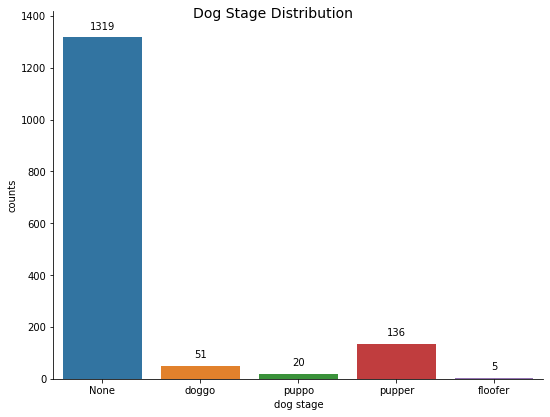

In [86]:
fig1 = sns.catplot("dog_stage",data=tweet_df,kind='count')

counts = tweet_df.dog_stage.value_counts()

fig1.fig.set_size_inches(8,6)
fig1.fig.suptitle('Dog Stage Distribution', fontsize=14)
fig1.set_axis_labels("dog stage", "counts")
fig1.set(ylim=(0, max(counts.values) + 100))

for i, val in enumerate(tweet_df.dog_stage.unique()):
    count = counts[val]
    fig1.ax.text(i, count + 30, count, ha="center")

1. The Majority of the people did not include the dog stage in their tweets. However, when the stage was mentioned, 'pupper' seems to be the most frequently used one. 

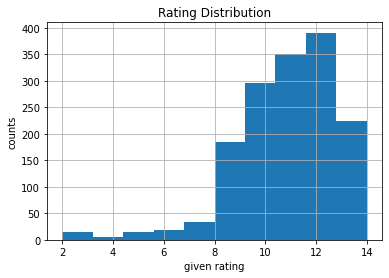

In [87]:
fig2 = tweet_df['rating_numerator'].hist(bins=10)
fig2.set_title('Rating Distribution', fontsize=12)
fig2.set_xlabel('given rating')
fig2.set_ylabel('counts')
plt.show()

In [88]:
tweet_df.rating_numerator.mean()

10.775963422599608

In [89]:
tweet_df.rating_numerator.std()

1.8991149390182775

In [90]:
tweet_df.rating_numerator.describe()

count    1531.000000
mean     10.775963  
std      1.899115   
min      2.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      14.000000  
Name: rating_numerator, dtype: float64

2. Dogs from WeRateDog twitter archive were given an approximate rating of 10.8/10. However, the most frequently used rating value was 12/10.

In [91]:
twitt_df.groupby('dog_stage').mean()

NameError: name 'twitt_df' is not defined

<Figure size 1008x432 with 0 Axes>

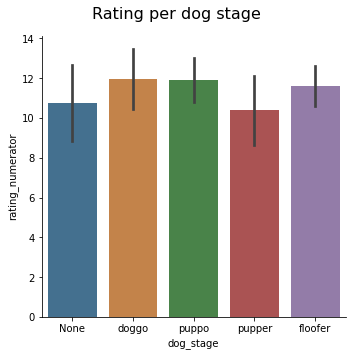

In [92]:
fig3 = plt.figure(figsize = (14,6))
fig3 = sns.catplot(x="dog_stage", y="rating_numerator",data=twitter_archive_master, saturation=.5,
                kind="bar", ci='sd')
fig3.fig.subplots_adjust(top=0.9)
fig3.fig.suptitle('Rating per dog stage', fontsize=16);


3. Tweets were the stage of a dog was not included got on average lower ratings than tweets mentioning dog stage, with 'doggo' being rated the highest. 